In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
# Read the Covid data
covid_data = pd.read_csv(r'h:\My Drive\Data Science Bootcamp\Group Project 1\COVID-19_Cases_Deaths_timeseries_national.csv')

# Combine the 'year' and 'month' columns to create a new 'date' column
covid_data['date'] = pd.to_datetime(covid_data[['year', 'month']].assign(day=1))

# Reorder the columns with 'date' as the left-most column
covid_data = covid_data.reindex(columns=['date'] + covid_data.columns[:-1].tolist())

covid_data.head(10)

,date,year,month,tot_cases,tot_deaths
0,2020-01-01,2020,1,17,0
1,2020-02-01,2020,2,190,0
2,2020-03-01,2020,3,78855,1631
3,2020-04-01,2020,4,3183725,176291
4,2020-05-01,2020,5,5861324,367445
5,2020-06-01,2020,6,8308351,472592
6,2020-07-01,2020,7,17280119,695676
7,2020-08-01,2020,8,21203882,680456
8,2020-09-01,2020,9,25962357,779384
9,2020-10-01,2020,10,39788625,1095919


In [3]:
# Read the employment data
employment_data = pd.read_csv(r'h:\My Drive\Data Science Bootcamp\Group Project 1\unemployment_timeseries_national.csv')

# Combine the 'year' and 'month' columns to create a new 'date' column
employment_data['date'] = pd.to_datetime(employment_data[['year', 'month']].assign(day=1))

# Reorder the columns with 'date' as the left-most column
employment_data = employment_data.reindex(columns=['date'] + employment_data.columns[:-1].tolist())

employment_data.head(10)

,date,year,month,labor_force,tot_employed,tot_unemployed,unemployment_rate
0,2018-01-01,2018,1,170526082,163499372,7026710,4.12
1,2018-02-01,2018,2,170751287,163806047,6945240,4.07
2,2018-03-01,2018,3,171048334,164185029,6863305,4.01
3,2018-04-01,2018,4,171306817,164531952,6774865,3.95
4,2018-05-01,2018,5,171457074,164763818,6693256,3.90
5,2018-06-01,2018,6,171504600,164878188,6626412,3.86
6,2018-07-01,2018,7,171485544,164626128,6578522,3.84
7,2018-08-01,2018,8,171485331,164914787,6570544,3.83
8,2018-09-01,2018,9,171560226,164951817,6608409,3.85
9,2018-10-01,2018,10,171723441,165050239,6673202,3.89


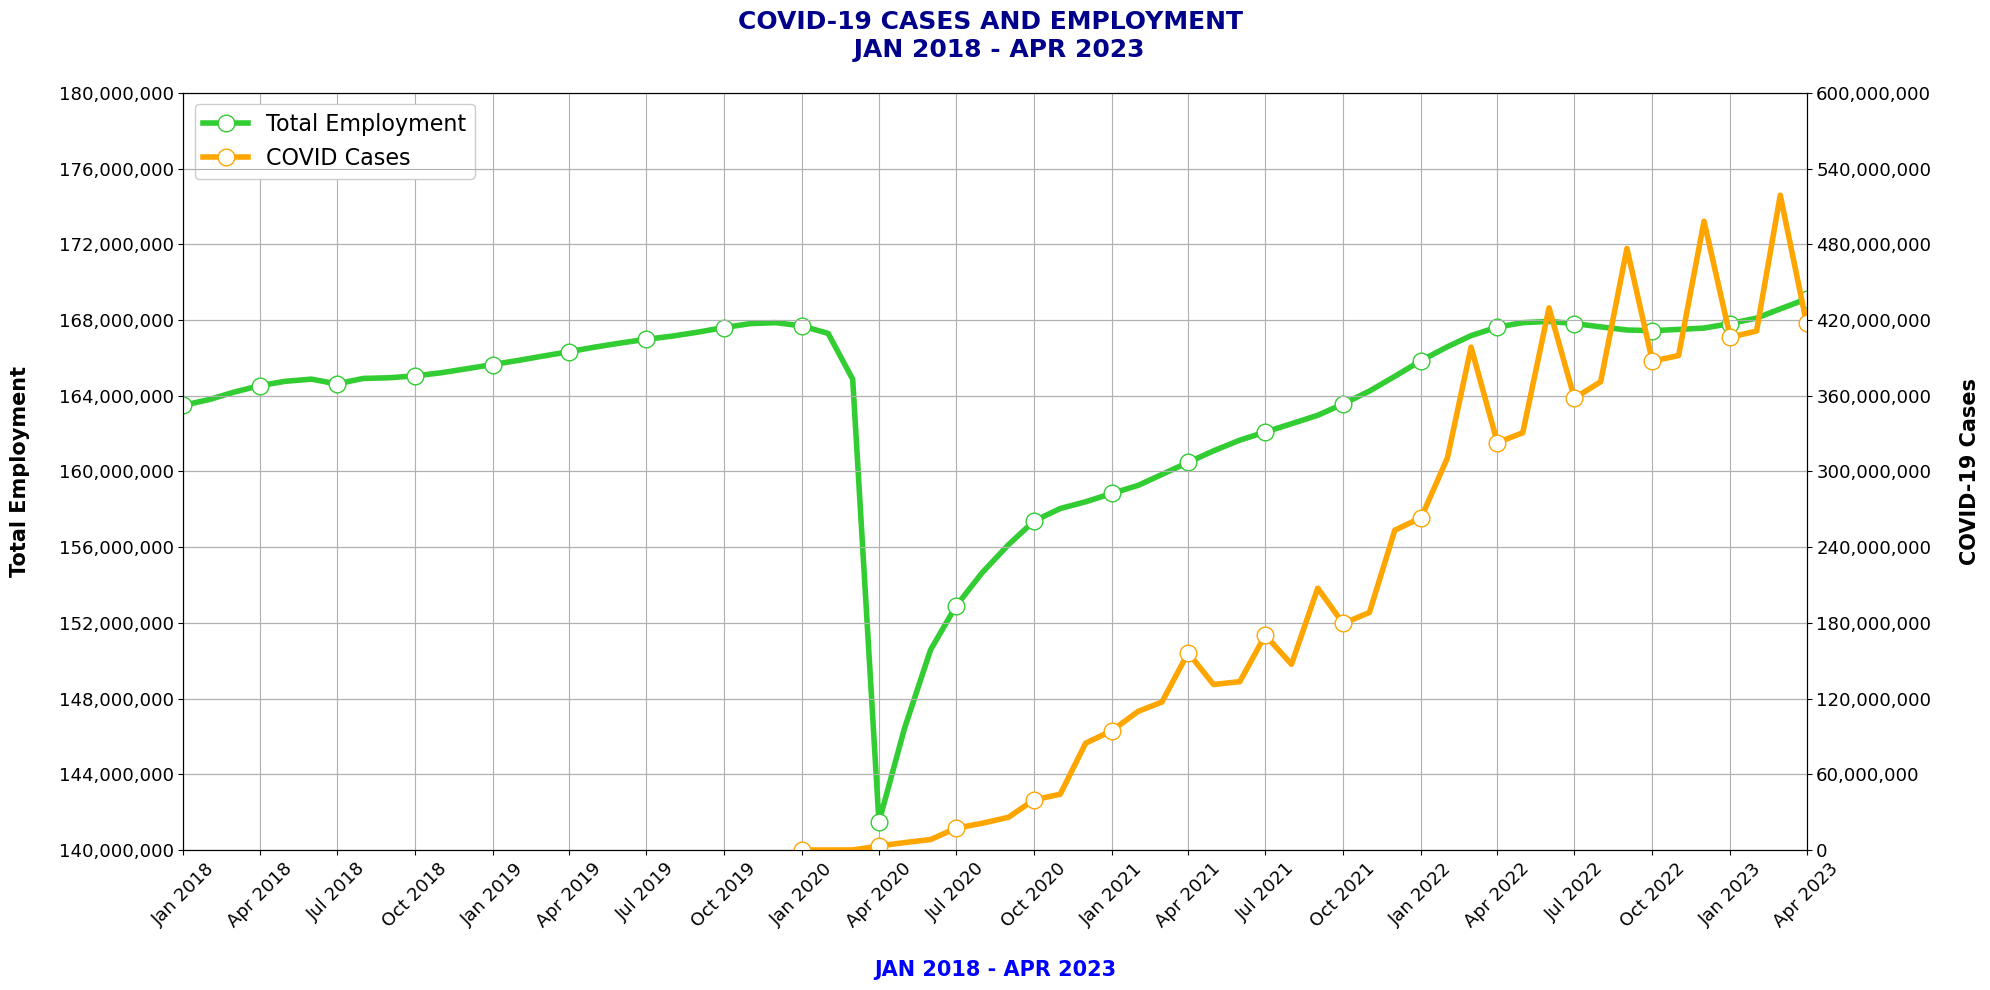

In [9]:
# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(20, 10))

# Plot employment data
line1 = ax1.plot(employment_data['date'], employment_data['tot_employed'], color='limegreen', label='Total Employment', linewidth=4, marker='o', markersize=12, markevery=3, markerfacecolor='white')

# Plot COVID-19 cases
ax2 = ax1.twinx()
line2 = ax2.plot(covid_data['date'], covid_data['tot_cases'], color='orange', label='COVID Cases', linewidth=4, marker='o', markersize=12, markevery=3, markerfacecolor='white')

# Combine the lines and labels for the legend
lines = line1 + line2
labels = [line.get_label() for line in lines]

# Set x-axis label
ax1.set_xlabel('\nJAN 2018 - APR 2023', color='blue', fontsize=15, fontweight='bold')

# Set y-axis label for employment data
ax1.set_ylabel('Total Employment\n', fontsize=15, fontweight='bold')

# Set y-axis limits and ticks for employment data
ax1.set_ylim(140000000, 180000000)
ax1.set_yticks(np.arange(140000000, 180000001, 4000000))
ax1.yaxis.set_major_formatter('{x:,.0f}')
ax1.yaxis.set_tick_params(labelcolor='black', labelsize=13)

# Set y-axis label for COVID-19 cases
ax2.set_ylabel('\nCOVID-19 Cases', fontsize=15, fontweight='bold')

# Set y-axis limits and ticks for COVID-19 cases
ax2.set_ylim(0, 600000000)
ax2.set_yticks(np.arange(0, 600000001, 60000000))
ax2.yaxis.set_major_formatter('{x:,.0f}')
ax2.yaxis.set_tick_params(labelcolor='black', labelsize=13)

# Format x-axis labels
start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2023-04-01')
ax1.set_xlim(start_date, end_date)
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax1.tick_params(axis='x', rotation=45, labelcolor='black', labelsize=13)

# Add gridlines
ax1.grid(True)
ax2.grid(True)

# Set chart title
plt.title('COVID-19 CASES AND EMPLOYMENT \n JAN 2018 - APR 2023\n', color='darkblue', fontsize=18, fontweight='bold')

# Display legend
legend = ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(0, 1), fontsize=16)

# Make the legend background opaque
legend.get_frame().set_alpha(1)

# Display the plot
plt.tight_layout()
plt.show()